# Telecom Customer Churn Prediction

This notebook focuses on building a **predictive model** to identify customers who are likely to churn. </br>
We use **Logistic Regression** to analyze the factors influencing churn and provide actionable business insights.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/churn.csv")
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


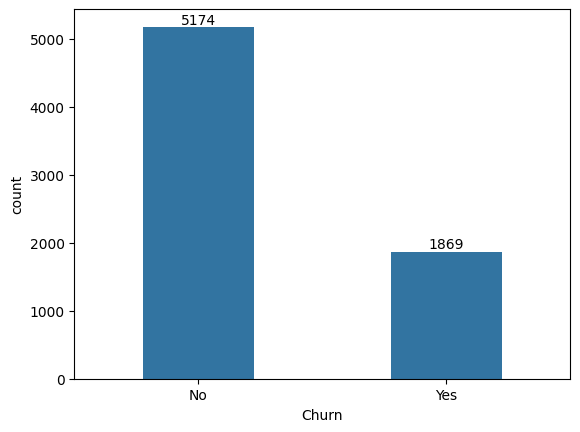

In [6]:
ax = sns.countplot(x = "Churn", data = df, width= 0.5, gap= 0.1)
ax.bar_label(ax.containers[0])

plt.show()

# Data Preprocessing

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking unique values for each columns

df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Checking for the columns with categorical properties

col_num = 0

for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) <= 10:
        print(f"\nColumn: {col} ({len(unique_vals)} unique values)")
        print(unique_vals)
        col_num += 1

print(f"\nTotal columns : {col_num}")


Column: gender (2 unique values)
['Female' 'Male']

Column: SeniorCitizen (2 unique values)
[0 1]

Column: Partner (2 unique values)
['Yes' 'No']

Column: Dependents (2 unique values)
['No' 'Yes']

Column: PhoneService (2 unique values)
['No' 'Yes']

Column: MultipleLines (3 unique values)
['No phone service' 'No' 'Yes']

Column: InternetService (3 unique values)
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity (3 unique values)
['No' 'Yes' 'No internet service']

Column: OnlineBackup (3 unique values)
['Yes' 'No' 'No internet service']

Column: DeviceProtection (3 unique values)
['No' 'Yes' 'No internet service']

Column: TechSupport (3 unique values)
['No' 'Yes' 'No internet service']

Column: StreamingTV (3 unique values)
['No' 'Yes' 'No internet service']

Column: StreamingMovies (3 unique values)
['No' 'Yes' 'No internet service']

Column: Contract (3 unique values)
['Month-to-month' 'One year' 'Two year']

Column: PaperlessBilling (2 unique values)
['Yes' 'No']

Column: Paymen

In [11]:
# Transforming categorical input to numeric (2 unique values)

for col in df.columns:
    unique_vals = df[col].unique()  # find unique values

    if len(unique_vals) == 2: # for two unique values only
        print(f"\nConverting column: {col}")
        print("Unique values:", unique_vals)

        new_values = [0 if value == unique_vals[0] else 1 for value in df[col]]

        df[col] = new_values

        print(f"Mapping: {unique_vals[0]} = 0, {unique_vals[1]} = 1")
    else:
        print(f"Skipped column: {col} (more than 2 unique values)")


Skipped column: customerID (more than 2 unique values)

Converting column: gender
Unique values: ['Female' 'Male']
Mapping: Female = 0, Male = 1

Converting column: SeniorCitizen
Unique values: [0 1]
Mapping: 0 = 0, 1 = 1

Converting column: Partner
Unique values: ['Yes' 'No']
Mapping: Yes = 0, No = 1

Converting column: Dependents
Unique values: ['No' 'Yes']
Mapping: No = 0, Yes = 1
Skipped column: tenure (more than 2 unique values)

Converting column: PhoneService
Unique values: ['No' 'Yes']
Mapping: No = 0, Yes = 1
Skipped column: MultipleLines (more than 2 unique values)
Skipped column: InternetService (more than 2 unique values)
Skipped column: OnlineSecurity (more than 2 unique values)
Skipped column: OnlineBackup (more than 2 unique values)
Skipped column: DeviceProtection (more than 2 unique values)
Skipped column: TechSupport (more than 2 unique values)
Skipped column: StreamingTV (more than 2 unique values)
Skipped column: StreamingMovies (more than 2 unique values)
Skipped c

In [12]:
# Transforming categorical input to numeric (3 unique values)

for col in df.columns:
    unique_vals = df[col].unique()  # find unique values

    if len(unique_vals) == 3:  # for three unique values only
        print(f"\nConverting column: {col}")
        print("Unique values:", unique_vals)

        new_values = [1 if value == unique_vals[0] else 2 if value == unique_vals[1] else 3 for value in df[col]]

        df[col] = new_values

        print(f"Mapping: {unique_vals[0]} = 1, {unique_vals[1]} = 2, {unique_vals[2]} = 3")
    else:
        print(f"Skipped column: {col} (not 3 unique values)")


Skipped column: customerID (not 3 unique values)
Skipped column: gender (not 3 unique values)
Skipped column: SeniorCitizen (not 3 unique values)
Skipped column: Partner (not 3 unique values)
Skipped column: Dependents (not 3 unique values)
Skipped column: tenure (not 3 unique values)
Skipped column: PhoneService (not 3 unique values)

Converting column: MultipleLines
Unique values: ['No phone service' 'No' 'Yes']
Mapping: No phone service = 1, No = 2, Yes = 3

Converting column: InternetService
Unique values: ['DSL' 'Fiber optic' 'No']
Mapping: DSL = 1, Fiber optic = 2, No = 3

Converting column: OnlineSecurity
Unique values: ['No' 'Yes' 'No internet service']
Mapping: No = 1, Yes = 2, No internet service = 3

Converting column: OnlineBackup
Unique values: ['Yes' 'No' 'No internet service']
Mapping: Yes = 1, No = 2, No internet service = 3

Converting column: DeviceProtection
Unique values: ['No' 'Yes' 'No internet service']
Mapping: No = 1, Yes = 2, No internet service = 3

Convertin

In [13]:
# Transforming categorical input to numeric (4 unique values)

for col in df.columns:
    unique_vals = df[col].unique()  # find unique values

    if len(unique_vals) == 4:  # for four unique values only
        print(f"\nConverting column: {col}")
        print("Unique values:", unique_vals)

        new_values = [1 if value == unique_vals[0] else 2 if value == unique_vals[1]
                      else 3 if value == unique_vals[2] else 4 for value in df[col]]

        df[col] = new_values

        print(f"Mapping: {unique_vals[0]} = 1, {unique_vals[1]} = 2, {unique_vals[2]} = 3, {unique_vals[3]} = 4")
    else:
        print(f"Skipped column: {col} (not 4 unique values)")


Skipped column: customerID (not 4 unique values)
Skipped column: gender (not 4 unique values)
Skipped column: SeniorCitizen (not 4 unique values)
Skipped column: Partner (not 4 unique values)
Skipped column: Dependents (not 4 unique values)
Skipped column: tenure (not 4 unique values)
Skipped column: PhoneService (not 4 unique values)
Skipped column: MultipleLines (not 4 unique values)
Skipped column: InternetService (not 4 unique values)
Skipped column: OnlineSecurity (not 4 unique values)
Skipped column: OnlineBackup (not 4 unique values)
Skipped column: DeviceProtection (not 4 unique values)
Skipped column: TechSupport (not 4 unique values)
Skipped column: StreamingTV (not 4 unique values)
Skipped column: StreamingMovies (not 4 unique values)
Skipped column: Contract (not 4 unique values)
Skipped column: PaperlessBilling (not 4 unique values)

Converting column: PaymentMethod
Unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Ma

In [14]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,0,1,1,1,1
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,1,2,2,1,2
InternetService,1,1,1,1,2
OnlineSecurity,1,2,2,2,1


In [15]:
# Convert all numeric-transformed columns back to categorical datatype
col_num = 0
for col in df.columns:
    unique_vals = df[col].unique()

    # Converting only columns with 2, 3, or 4 unique values
    if 2 <= len(unique_vals) <= 4:
        df[col] = df[col].astype("category", copy=False)
        print(f"Converted column '{col}' to category")
        col_num += 1
    else:
        print(f"\nSkipped column '{col}' (not 2,3,4 unique values)\n")


print(f"\nColumns affected: {col_num}")



Skipped column 'customerID' (not 2,3,4 unique values)

Converted column 'gender' to category
Converted column 'SeniorCitizen' to category
Converted column 'Partner' to category
Converted column 'Dependents' to category

Skipped column 'tenure' (not 2,3,4 unique values)

Converted column 'PhoneService' to category
Converted column 'MultipleLines' to category
Converted column 'InternetService' to category
Converted column 'OnlineSecurity' to category
Converted column 'OnlineBackup' to category
Converted column 'DeviceProtection' to category
Converted column 'TechSupport' to category
Converted column 'StreamingTV' to category
Converted column 'StreamingMovies' to category
Converted column 'Contract' to category
Converted column 'PaperlessBilling' to category
Converted column 'PaymentMethod' to category

Skipped column 'MonthlyCharges' (not 2,3,4 unique values)


Skipped column 'TotalCharges' (not 2,3,4 unique values)

Converted column 'Churn' to category

Columns affected: 17


# Model Building

In [16]:
# Splitting the Dataset
y = df.Churn
X = df.drop(['customerID', 'Churn'], axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler
# Processing only numeric columns & not the categorical one
numeric_cols = [col for col in X.columns if X[col].dtype != "category"]

scaler = StandardScaler()

# Only scale numeric columns
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# NOTE: Scaling all columns is wrong because it distorts categorical features, turning discrete labels into meaningless continuous values.



In [18]:
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,-1.277445,0,1,1,1,1,1,1,1,1,1,0,1,-1.160323,-0.992611
1,1,0,1,0,0.066327,1,2,1,2,2,2,1,1,1,2,1,2,-0.259629,-0.172165
2,1,0,1,0,-1.236724,1,2,1,2,1,1,1,1,1,1,0,2,-0.362660,-0.958066
3,1,0,1,0,0.514251,0,1,1,2,2,2,2,1,1,2,1,3,-0.746535,-0.193672
4,0,0,1,0,-1.236724,1,2,2,1,2,1,1,1,1,1,0,1,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,-0.340876,1,3,1,2,2,2,2,2,2,2,0,2,0.665992,-0.127605
7039,0,0,0,1,1.613701,1,3,2,1,1,2,1,2,2,2,0,4,1.277533,2.242606
7040,0,0,0,1,-0.870241,0,1,1,2,2,1,1,1,1,1,0,1,-1.168632,-0.852932
7041,1,1,0,0,-1.155283,1,3,2,1,2,1,1,1,1,1,0,2,0.320338,-0.870513


In [19]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state= 42)

In [20]:
# Training the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight= 'balanced') # Balancing the biasness towards majority of "Not Churn"

lr.fit(X_train, y_train)

y_prod = lr.predict_proba(X_test)[:,1]
threshold = 0.4

# y_pred = lr.predict(X_test)
# manually predicting using customised threshold instead of "0.5"
y_pred = (y_prod >= threshold).astype(int)


In [21]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

# Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy : {accuracy: .2f}")

Accuracy :  0.70


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75      1539
           1       0.47      0.91      0.62       574

    accuracy                           0.70      2113
   macro avg       0.71      0.77      0.69      2113
weighted avg       0.82      0.70      0.72      2113



In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[960 579]
 [ 53 521]]


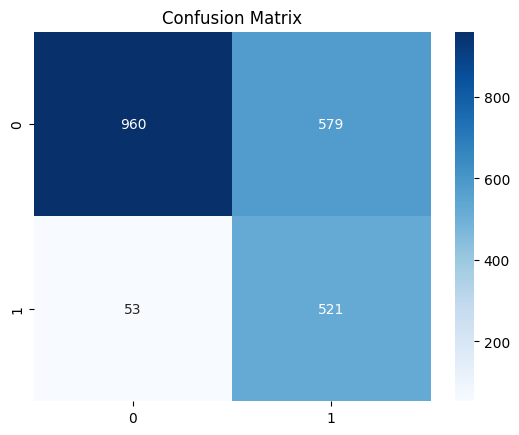

Mapping: Not Churn = 0, Churn = 1


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

print("Mapping: Not Churn = 0, Churn = 1")

# Feature Influence

             Feature  Coefficient
0             gender    -0.066087
1      SeniorCitizen     0.198574
2            Partner    -0.007235
3         Dependents    -0.105106
4             tenure    -1.172400
5       PhoneService    -0.877594
6      MultipleLines     0.124027
7    InternetService     0.395447
8     OnlineSecurity    -0.500869
9       OnlineBackup     0.252278
10  DeviceProtection    -0.095550
11       TechSupport    -0.374933
12       StreamingTV    -0.051217
13   StreamingMovies     0.213550
14          Contract    -0.770110
15  PaperlessBilling    -0.305982
16     PaymentMethod    -0.133631
17    MonthlyCharges     0.364505
18      TotalCharges     0.566551


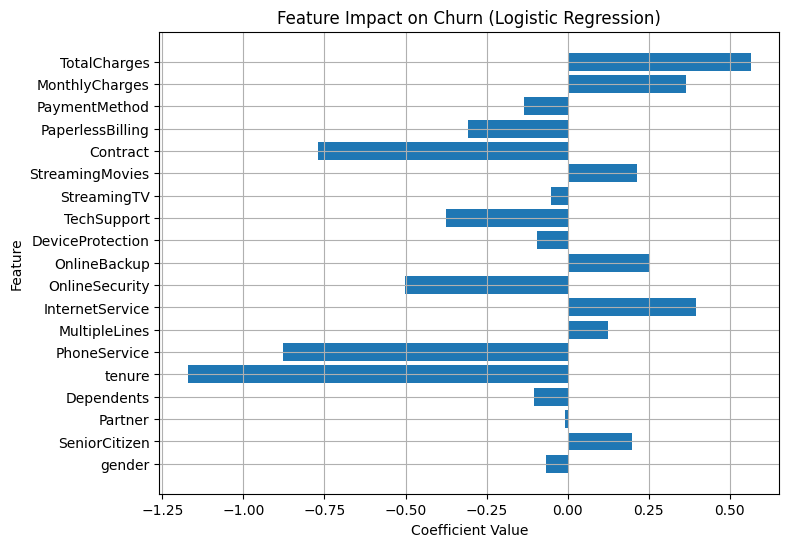

In [26]:
# Extracting Top Influencing Features

# Map features to coefficients
coeff = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
})

print(coeff)  # Optional: see exact values

# Simple bar plot of coefficients
plt.figure(figsize=(8,6))
plt.barh(coeff['Feature'], coeff['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Impact on Churn (Logistic Regression)')
plt.grid(True)
plt.show()

# Conclusion and Key Insights

▶ The Logistic Regression model predicts telecom churn with a **threshold of 0.4** and an overall **accuracy of 70%**.

▶ Model performance highlights:

- Recall for churners: **91%** (most potential churners are correctly identified)

- Precision: **47%** (some non-churners are flagged, which is acceptable for retention focus)


▶ Top drivers that **increase churn**: total charges, monthly charges, Internet services, online backup

▶ Top drivers that **reduce churn**: contract type, tech support, phone service, tenure, online security

▶ Business insight:

- Customers with **high bills** and **fewer support services** are more likely to leave

- Retention strategies like loyalty offers, better support, or long-term contract incentives can help reduce churn
